In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Shape of a dataset
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### From the describe funtion we can see that balance is highly skewed and estimated salary is sligthly skewed

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### There is no null values present in dataset

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Dropping Irrelevant Feature RowNumber, CustomerId and Surname are irrelevant, so we drop those features.

In [9]:
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

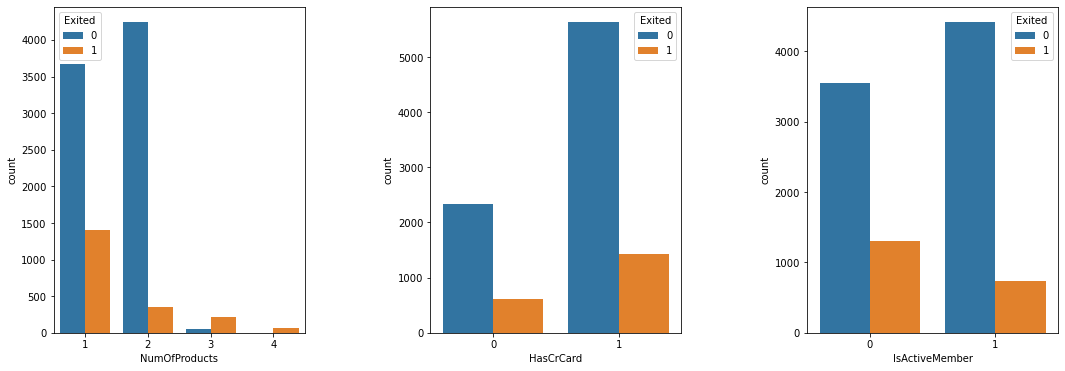

In [10]:
_,ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.5)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax = ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

### Customer with 3 or 4 products are higher chances to Churn

In [11]:
# Converting the categorical variables into numerical by using the one hot encoding
df= pd.get_dummies(df,drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## Plotting the scaatter plot between age and balance with hue of exited

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

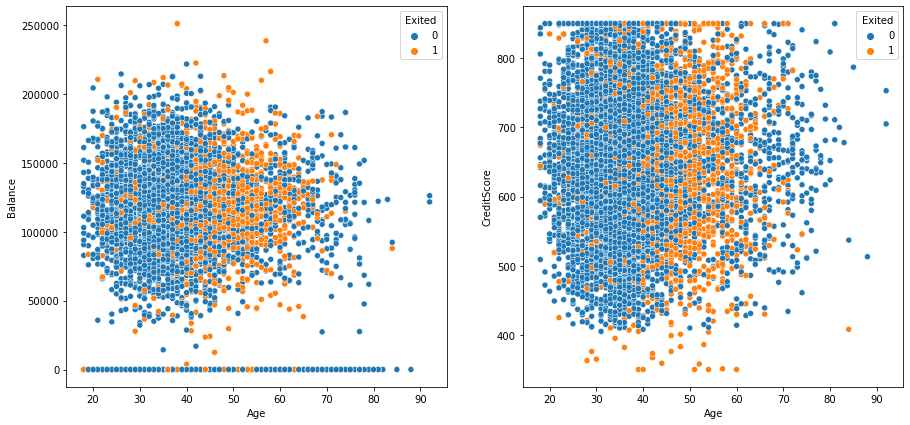

In [13]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

### From above scatter plot we have following observations:
#### 1) 40 to 70 years old customers are higher chances to churn
#### 2) Customer with CreditScore less then 400 are higher chances to churn

### Now spillting the independent features and dependent feature

In [14]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

## Plotting Displot for seeing the skewness of features

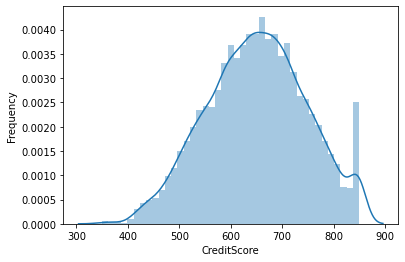

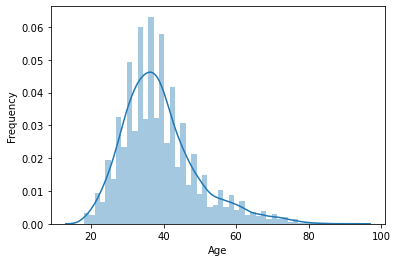

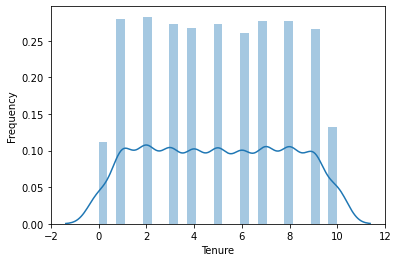

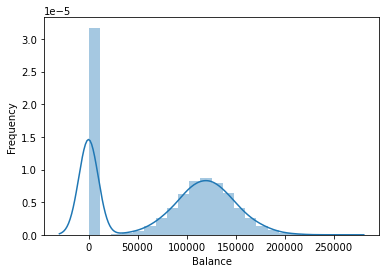

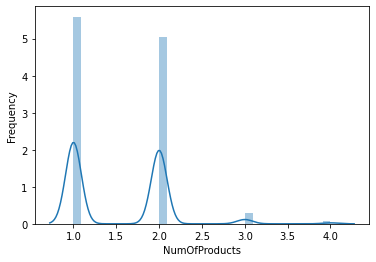

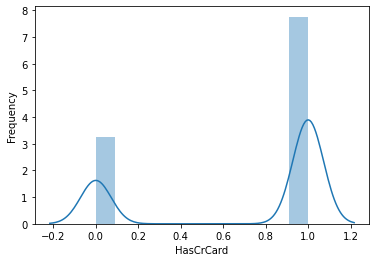

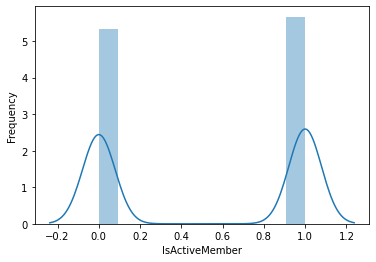

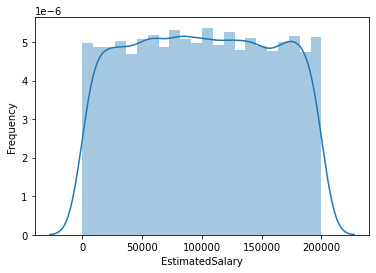

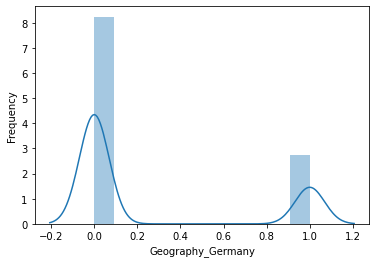

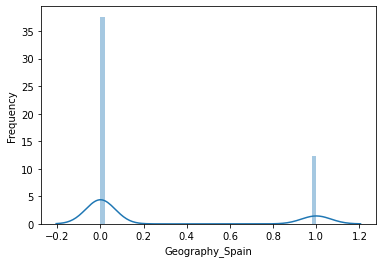

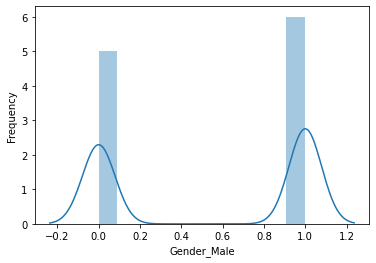

In [15]:
for col in X:
    plt.figure()
    sns.distplot(X[col])
    plt.ylabel("Frequency")
    plt.show()

### From above distplot we can see that age and balance columns are slightly skewed

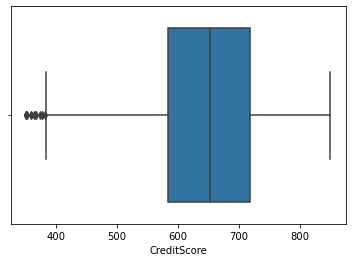

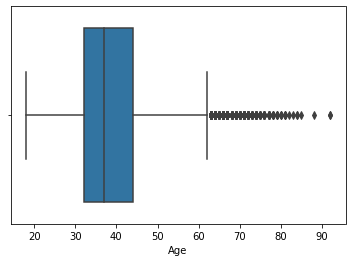

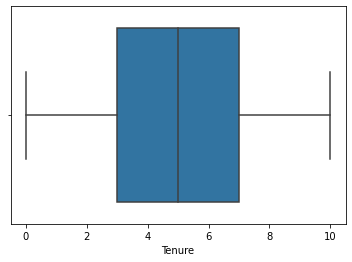

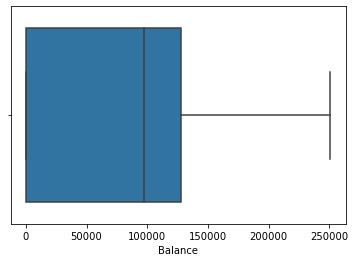

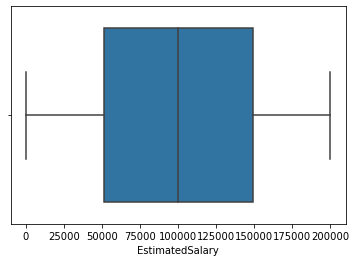

In [16]:
columns = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
for col in columns:
    plt.figure()
    sns.boxplot(X[col])
    plt.show()

### From the above box plot we can see that CreditScore and age have some outliers

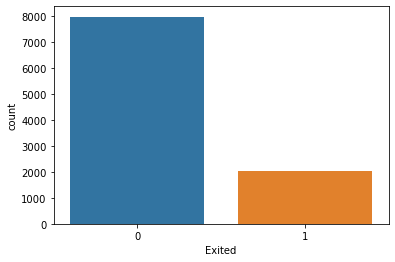

In [17]:
# target count
plt.figure()
sns.countplot(y)
plt.show()

### From the above countplot we can see that the data highly imbalnce.

<AxesSubplot:>

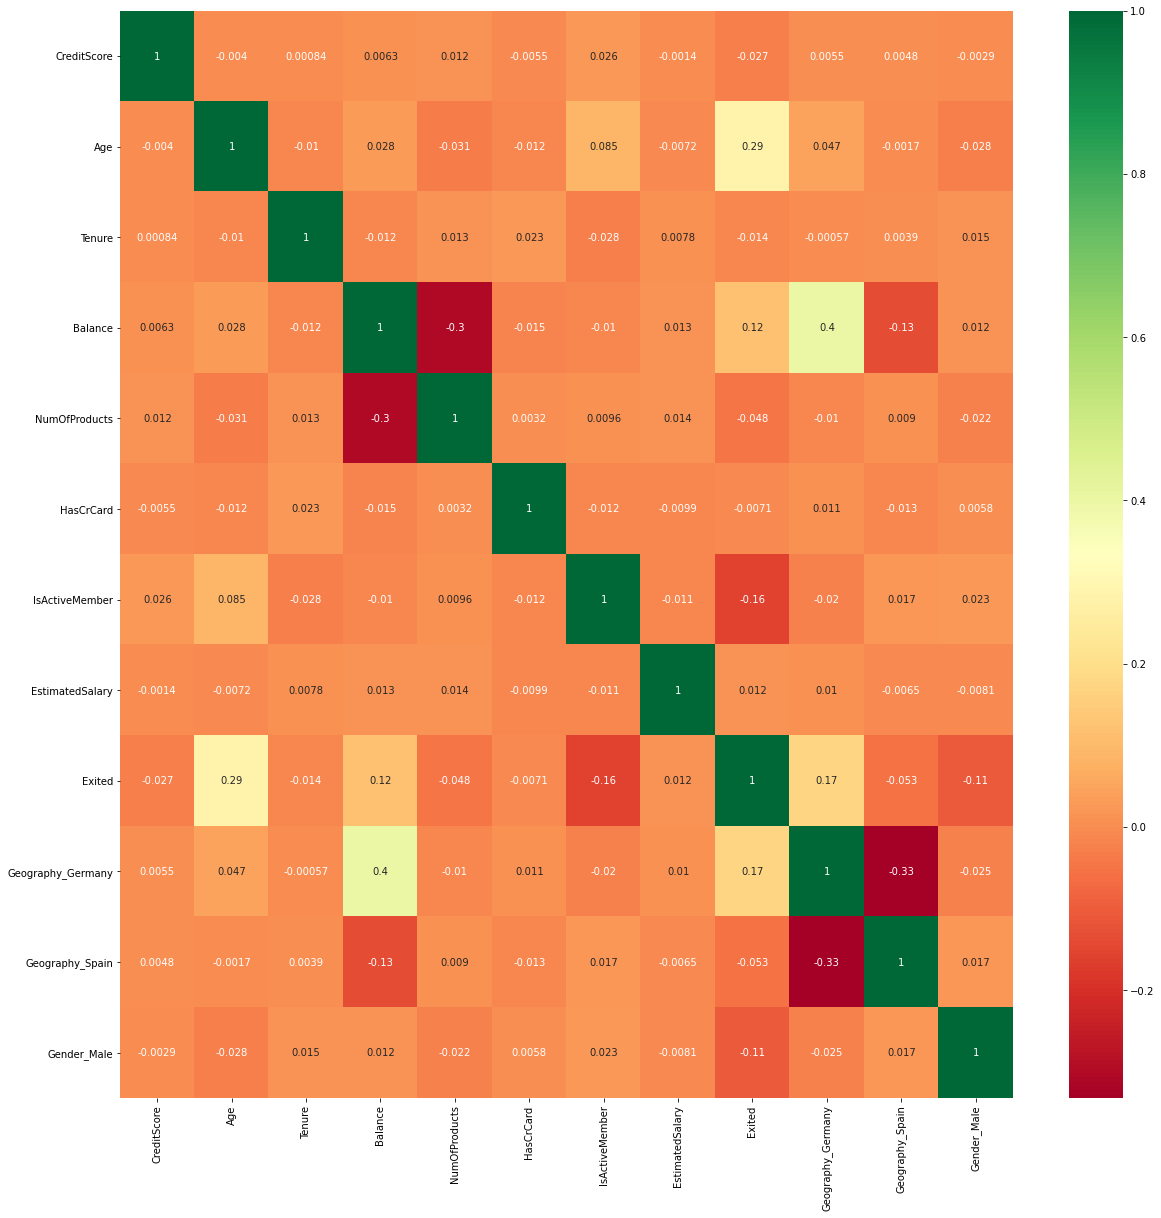

In [18]:
# Plotting The Correlations between all the features
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

### From the above heatmap we can see that there is not multi-colinarity between two features

In [19]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

### Doing scaling on Independent features by using standard scaler

In [20]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### as we know data is imbalance so doing oversampling

In [21]:
# oversampling 
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [23]:
y_train_sm.value_counts()

0    6378
1    6378
Name: Exited, dtype: int64

### Now we can see that in traning data both for 0 and 1 data are same

# Naive Bayes

In [24]:
model = GaussianNB()

model.fit(X_train_sm,y_train_sm)

GaussianNB()

In [25]:
# predict on testing

y_pred = model.predict(X_test)

In [26]:
print("accuracy", accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))
print("recall", recall_score(y_test,y_pred))
print("f1", f1_score(y_test,y_pred))

accuracy 0.753
precision 0.4396946564885496
recall 0.6939759036144578
f1 0.5383177570093458


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1585
           1       0.44      0.69      0.54       415

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



### As we see here accuracy is only 75% by using Naive Bayes algorithum

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=1)

In [31]:
y_pred = knn.predict(X_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1585
           1       0.50      0.53      0.51       415

    accuracy                           0.79      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.79      0.79      2000



### By using K value 1 we getting accuracy of 79% now we will choosing the k value in next step.

## Choosing the K value

In [33]:
error_rate = []

# Will take some time
for i in range(1,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_sm,y_train_sm)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

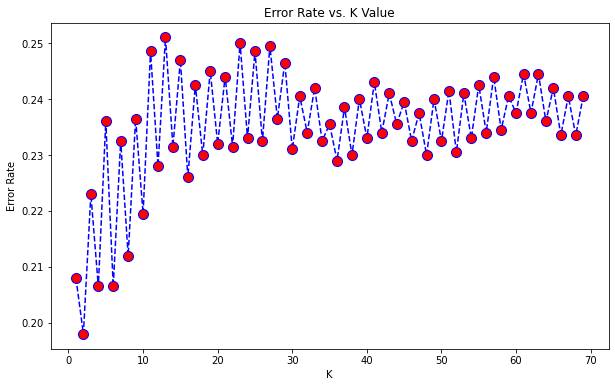

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### from the above graph we can see that after the value k = 4 there is so much flucuation in error rate so selecting the k = 4

In [35]:
# NOW WITH K=2
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train_sm,y_train_sm)
pred = knn.predict(X_test)

print('WITH K=4')
print('\n')

print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=4




              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1585
           1       0.50      0.57      0.53       415

    accuracy                           0.79      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg       0.80      0.79      0.80      2000

0.7935


### Now we can see that after selecting the value of k by using graph the accuracy is increased but the recall of 1 is very poor

# Logistics Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# model

lr = LogisticRegression(random_state=1)
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(random_state=1)

In [38]:
# train score

lr.score(X_train_sm, y_train_sm)

0.7099404201944183

In [39]:
# prediction on test

y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1585
           1       0.44      0.69      0.54       415

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



### Now using the logistics regression the accuracy is almost same as KNN i.e 82% but here recall 1 is slightly improved

# Desicion Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
# model
# gini index
model = DecisionTreeClassifier()
model.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier()

In [42]:
# train score
model.score(X_train_sm,y_train_sm)

1.0

In [43]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1585
           1       0.48      0.57      0.52       415

    accuracy                           0.78      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.78      0.79      2000



### now using decision tree accuracy is 80% but here recall is improved considerably.

In [44]:
model.get_depth()

29

### In the above Desicion tree depth is 25 and hence trainning data is overfitting hence we are now using prunning techinque

In [45]:
# desicion tree using prunning

model2 = DecisionTreeClassifier(max_depth=8,min_samples_leaf=3)
model2.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3)

In [46]:
# train score
model2.score(X_train,y_train)

0.832

In [47]:
y_pred = model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1585
           1       0.56      0.65      0.60       415

    accuracy                           0.82      2000
   macro avg       0.73      0.76      0.74      2000
weighted avg       0.83      0.82      0.82      2000



### After using the prunning technique we can see that accuracy is 81% and here recall is increase

# Random Forest

In [48]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1585
           1       0.63      0.58      0.60       415

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



### By using Random Forest we can see that accuracy is increased to 84% but recall for 1 is decresed at same time

In [51]:
rf2 = RandomForestClassifier(criterion='entropy', max_features=0.45,min_samples_split=9, random_state=1)
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=0.45,
                       min_samples_split=9, random_state=1)

In [52]:
y_pred = rf2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.79      0.47      0.58       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



### Here also used the Random forest but we used entropy as criterion here also accuracy is increased to 86% but recall of 1 is decresed further.

# Ada boosting

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train_sm,y_train_sm)

AdaBoostClassifier(random_state=1)

In [55]:
# prediction
y_pred = model3.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1585
           1       0.54      0.69      0.61       415

    accuracy                           0.81      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



### Now using the adaboost accuracy is 81% and recall of 1 is 70%.

# Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
model4 = GradientBoostingClassifier(random_state=1, n_estimators=300, learning_rate=0.8)
model4.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier(learning_rate=0.8, n_estimators=300, random_state=1)

In [58]:
# prediction
y_pred = model4.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1585
           1       0.67      0.55      0.61       415

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.84      0.85      0.84      2000



# Hyper parameter tunning using GridSearchCV with Gradient boosting

In [59]:
param_grid = {"n_estimators":[75,100,125,150],
              "learning_rate":[0.1,0.2,0.3],
              "min_samples_leaf":[10,20],
              "max_depth":[2,3,4,5]}

In [60]:
# model
gbc = GradientBoostingClassifier(random_state=1)

In [61]:
# grid search
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(gbc, param_grid, cv=2)

In [62]:
gs.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [75, 100, 125, 150]})

In [63]:
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 10,
 'n_estimators': 150}

### Now applying best parameters in Gradient boosting 

In [64]:
modelGV = GradientBoostingClassifier(random_state=1, n_estimators=150, learning_rate=0.1, max_depth=5,min_samples_leaf=10)
modelGV.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=10, n_estimators=150,
                           random_state=1)

In [65]:
# prediction
y_pred = modelGV.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1585
           1       0.69      0.58      0.63       415

    accuracy                           0.86      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.85      0.86      0.85      2000



### By using the hyperparameter tunning and gradient boosting we geeting accuracy of 86%.

# XG Boosting

In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=150,random_state=1)

xgb.fit(X_train_sm,y_train_sm)


[19:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred = xgb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1585
           1       0.71      0.55      0.62       415

    accuracy                           0.86      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000



### by using the XG boost also the accuracy is 86% only but recall of 1 is only 56%

# SVM

In [68]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [69]:
lin_svc = LinearSVC(random_state=1,C=0.5)
lin_svc.fit(X_train_sm,y_train_sm)

LinearSVC(C=0.5, random_state=1)

In [70]:
y_pred = lin_svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1585
           1       0.41      0.69      0.52       415

    accuracy                           0.73      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.80      0.73      0.75      2000



### By using the Support vector linear we getting accuracy of 73%

# SVC

In [71]:
svc = SVC(kernel="poly", degree=1, random_state=1, C=1)
svc.fit(X_train_sm,y_train_sm)

SVC(C=1, degree=1, kernel='poly', random_state=1)

In [72]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1585
           1       0.41      0.70      0.52       415

    accuracy                           0.73      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.80      0.73      0.75      2000



In [73]:
svc = SVC(kernel="rbf",random_state=1,C=1.0)
svc.fit(X_train_sm,y_train_sm)

SVC(random_state=1)

In [74]:
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1585
           1       0.51      0.73      0.60       415

    accuracy                           0.80      2000
   macro avg       0.72      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



### By using the SVC poly kernal we getting accuracy of 73% and by using rbf kernal getting accuracy of 80% and here recall of 1 is also 73%

In [79]:
output = xgb.predict([[619,40,2,10000,0,0,1,22000,0,0,1]])


In [80]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [81]:
output

array([0], dtype=int64)

In [82]:
import pickle
file = open("xgb.pkl","wb")
pickle.dump(xgb,file)
file.close()